# Notebook to Create the `Allocation Time` CSV File

In [1]:
import pandas as pd
from pathlib import Path
import os

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
OUTPUT_BASE_FILE_PATH = Path("Only Megha")

In [3]:
CENTRALISED_BASE_FILE_PATH = Path("New_GOOG_sub_trace_10k_1GM_1LM")
CENTRALISED_CSV_FILE_NAME = [f for f in os.listdir(CENTRALISED_BASE_FILE_PATH)
                                 if os.path.isfile(CENTRALISED_BASE_FILE_PATH / Path(f)) and f.endswith("_jobs_info.csv")][0]  # "record-2022-01-05-14-54-13_jobs_info.csv"

DISTRIBUTED_BASE_FILE_PATH = Path("New_GOOG_sub_trace_10k_4GM_25LM")
DISTRIBUTED_CSV_FILE_NAME = [f for f in os.listdir(DISTRIBUTED_BASE_FILE_PATH)
                                 if os.path.isfile(DISTRIBUTED_BASE_FILE_PATH / Path(f)) and f.endswith("_jobs_info.csv")][0]  # "record-2021-12-09-21-03-12_jobs_info.csv"

NETWORK_DELAY = 0.0005

In [4]:
# os.listdir(DISTRIBUTED_BASE_FILE_PATH)

In [5]:
CSV_FILE_COLUMN_NAME_LIST = ["Job ID", "Task ID", "Job Arrival Time",
                             "Task Launch Time", "Task Duration (Trace)",
                             "Task End Time On Node"]

# Loading the Centralised CSV File

In [6]:
CENTRALISED_CSV_FILE_PATH = CENTRALISED_BASE_FILE_PATH / Path(CENTRALISED_CSV_FILE_NAME)

centralised_df = pd.read_csv(CENTRALISED_CSV_FILE_PATH)

centralised_df["Allocation Time"] = centralised_df["Task Launch Time"] - centralised_df["Job Arrival Time"] + NETWORK_DELAY

centralised_df

,Job ID,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task Duration (GM),Task Queuing Delay,Task End Time On Node,Allocation Time
0,1,1,281294.20,281294.201,79782,79782.0015,0.001,361076.2015,0.0015
1,1,2,281294.20,281294.201,80279,80279.0015,0.001,361573.2015,0.0015
2,1,3,281294.20,281294.201,78543,78543.0015,0.001,359837.2015,0.0015
3,1,4,281294.20,281294.201,79460,79460.0015,0.001,360754.2015,0.0015
4,1,5,281294.20,281294.201,84355,84355.0015,0.001,365649.2015,0.0015
...,...,...,...,...,...,...,...,...,...
312553,9997,17,299997.93,300006.433,53,61.5035,8.503,300059.4335,8.5035
312554,9997,18,299997.93,300006.623,43,51.6935,8.693,300049.6235,8.6935
312555,9998,1,299997.94,299999.643,186,187.7035,1.703,300185.6435,1.7035
312556,9999,1,299997.95,299999.645,187,188.6955,1.695,300186.6455,1.6955


In [7]:
# assert sparrow_df['Task End Time On Node'].equals(sparrow_df['Task End Time On Node (Dervied)'])

In [8]:
centralised_df.dtypes

Job ID                     int64
Task ID                    int64
Job Arrival Time         float64
Task Launch Time         float64
Task Duration (Trace)      int64
Task Duration (GM)       float64
Task Queuing Delay       float64
Task End Time On Node    float64
Allocation Time          float64
dtype: object

# Loading the Distributed CSV File

In [9]:
DISTRIBUTED_CSV_FILE_PATH = DISTRIBUTED_BASE_FILE_PATH / Path(DISTRIBUTED_CSV_FILE_NAME)
distributed_df = pd.read_csv(DISTRIBUTED_CSV_FILE_PATH)

distributed_df["Allocation Time"] = distributed_df["Task Launch Time"] - distributed_df["Job Arrival Time"] + NETWORK_DELAY

distributed_df

,Job ID,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task Duration (GM),Task Queuing Delay,Task End Time On Node,Allocation Time
0,1,1,281294.20,281294.201,79782,79782.0015,0.001,361076.2015,0.0015
1,1,2,281294.20,281294.201,80279,80279.0015,0.001,361573.2015,0.0015
2,1,3,281294.20,281294.201,78543,78543.0015,0.001,359837.2015,0.0015
3,1,4,281294.20,281294.201,79460,79460.0015,0.001,360754.2015,0.0015
4,1,5,281294.20,281294.201,84355,84355.0015,0.001,365649.2015,0.0015
...,...,...,...,...,...,...,...,...,...
312553,9997,17,299997.93,300004.631,53,59.7015,6.701,300057.6315,6.7015
312554,9997,18,299997.93,300004.833,43,49.9035,6.903,300047.8335,6.9035
312555,9998,1,299997.94,300683.025,186,871.0855,685.085,300869.0255,685.0855
312556,9999,1,299997.95,300683.039,187,872.0895,685.089,300870.0395,685.0895


In [10]:
distributed_df.dtypes

Job ID                     int64
Task ID                    int64
Job Arrival Time         float64
Task Launch Time         float64
Task Duration (Trace)      int64
Task Duration (GM)       float64
Task Queuing Delay       float64
Task End Time On Node    float64
Allocation Time          float64
dtype: object

---

In [11]:
data = [centralised_df["Allocation Time"],
        distributed_df["Allocation Time"],
       ]

headers = ["Megha Centralised Task Allocation Time", "Megha Distributed Task Allocation Time"]

final_df = pd.concat(data, axis=1, keys=headers)

final_df

,Megha Centralised Task Allocation Time,Megha Distributed Task Allocation Time
0,0.0015,0.0015
1,0.0015,0.0015
2,0.0015,0.0015
3,0.0015,0.0015
4,0.0015,0.0015
...,...,...
312553,8.5035,6.7015
312554,8.6935,6.9035
312555,1.7035,685.0855
312556,1.6955,685.0895


In [12]:
final_df.index

RangeIndex(start=0, stop=312558, step=1)

Megha Centralised Task Allocation Time


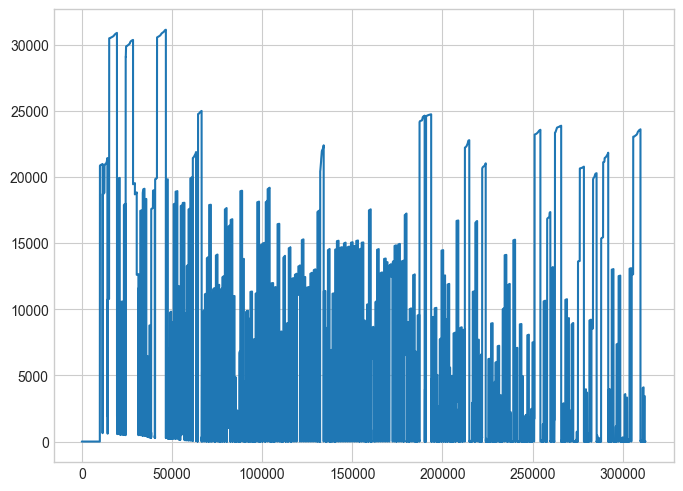

In [13]:
print("Megha Centralised Task Allocation Time")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.axes()

x = final_df.index  # Job ID
y = final_df["Megha Centralised Task Allocation Time"]

ax.plot(x, y)

Megha Distributed Task Allocation Time


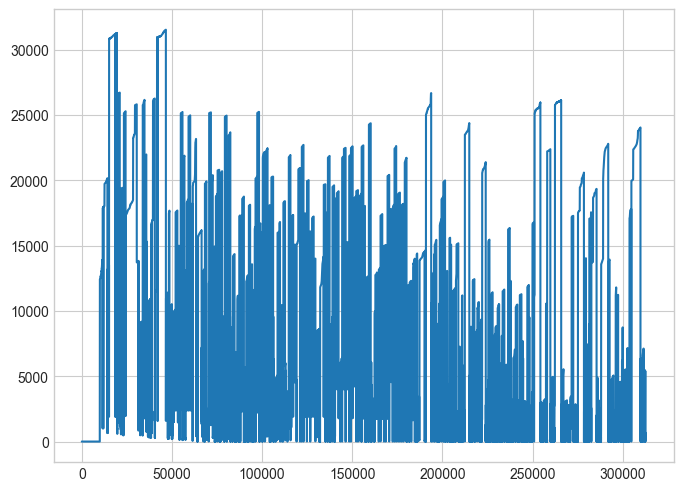

In [14]:
print("Megha Distributed Task Allocation Time")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.axes()

x = final_df.index  # Job ID
y = final_df["Megha Distributed Task Allocation Time"]

ax.plot(x, y)

plt.show()

In [15]:
try:
    os.mkdir(OUTPUT_BASE_FILE_PATH / Path(f"{CENTRALISED_BASE_FILE_PATH}_{DISTRIBUTED_BASE_FILE_PATH}"))
except FileExistsError as e:
    path = OUTPUT_BASE_FILE_PATH / Path(f"{CENTRALISED_BASE_FILE_PATH}_{DISTRIBUTED_BASE_FILE_PATH}")
    print(f"Folder: {path} already exists!")

In [16]:
final_df.to_csv(OUTPUT_BASE_FILE_PATH / Path(f"{CENTRALISED_BASE_FILE_PATH}_{DISTRIBUTED_BASE_FILE_PATH}") / Path(f"task_allocation_times_{CENTRALISED_BASE_FILE_PATH}_{DISTRIBUTED_BASE_FILE_PATH}.csv"))

In [17]:
final_df["Megha Centralised Task Allocation Time"].describe()

count    312558.000000
mean      11048.453752
std        8576.183160
min           0.001500
25%        2149.119000
50%       11376.841500
75%       17167.873000
max       31126.427500
Name: Megha Centralised Task Allocation Time, dtype: float64

In [18]:
final_df["Megha Distributed Task Allocation Time"].describe()

count    312558.000000
mean      12013.557963
std        9143.756436
min           0.001500
25%        2466.708500
50%       12679.004500
75%       19394.060500
max       31530.077500
Name: Megha Distributed Task Allocation Time, dtype: float64

---